参考：https://qiita.com/snufkon/items/ae0f4930fddce1a01185

### thetaの事前分布を設定して、観測結果（N,a）の元でMCMC

In [1]:
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt


# 試行回数と観測結果(回数)
N = 100
a = 5

with pm.Model() as model:
    # 事前分布
    #  範囲が 0 〜 1 の一様分布とする
    theta = pm.Uniform('theta', lower=0, upper=1)

    # 尤度関数
    #   ベルヌーイ試行を N 回行った時の観測回数 a が従う分布として二項分布を設定する
    obs = pm.Binomial('a', p=theta, n=N, observed=a)

    # 推論を実行し、事後分布から 5000*2 サンプルを得る
    trace = pm.sample(5000, chains=2)


/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 5 seconds.


### thetaのサンプリング結果

/var/folders/mb/p6b6l_1j25q0m7n939wwqwk00000gn/T/ipykernel_13654/1015729065.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


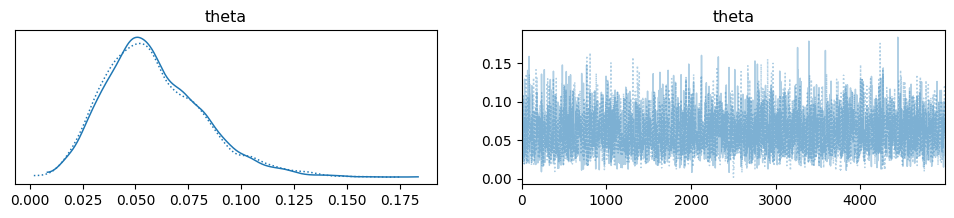

In [2]:
with model:
    pm.traceplot(trace)

### 要約統計量の表示

In [6]:
with model:
    # HDI(highest density interval) として 95% HDI を設定
    print(pm.summary(trace, hdi_prob=0.95))


        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.059  0.024     0.018      0.106        0.0      0.0    4000.0   

       ess_tail  r_hat  
theta    4984.0    1.0  


### 要約統計量付きでサンプリング結果を可視化

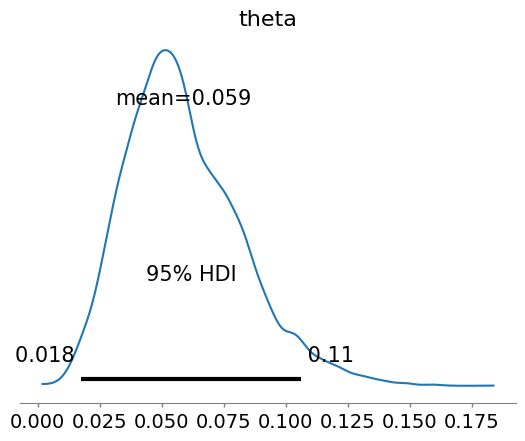

In [7]:
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)

In [12]:
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace, var_names=[obs, theta])

KeyError: a ~ Binomial